# Sentiment Analysis - SVM with TFIDF Term Weighting

`SVM Kernel = Linear; Term Weighting = TFRF`

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import numpy as np 
import re #RegEx
import itertools
import matplotlib.pyplot as plt
 
from sklearn import svm #Import SVM Classification
from sklearn.feature_extraction.text import CountVectorizer #Count Vector Space Model
from sklearn import metrics #Matrix Builder
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold #Import KFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.metrics import classification_report
from textvec import vectorizers

## Load Dataset

*Dataset is already preprocessed before.*

In [2]:
df = pd.read_csv('data/clean_tweets.csv')
df #Print Dataset

,tweet,stemming,label
0,#AyoTolakUUIKN \n\nProyek IKN membuka peluang ...,"['proyek', 'ikn', 'buka', 'peluang', 'oligarki...",0.0
1,Tolak UU IKN karena berpotensi merusak lingkun...,"['tolak', 'uu', 'ikn', 'potensi', 'rusak', 'li...",0.0
2,UU IKN hanya akan merugikan rakyat dengan huta...,"['uu', 'ikn', 'rugi', 'rakyat', 'hutang', 'rib...",0.0
3,Jika UU ini diterapkan yang terjadi adalah mas...,"['uu', 'terap', 'masyarakat', 'rasa', 'rugi', ...",0.0
4,UU IKN Syarat kepentingan oligarki. Tolak n ba...,"['uu', 'ikn', 'syarat', 'penting', 'oligarki',...",0.0
...,...,...,...
5887,Horee!! Kabar gembira gaes!\nProses pemindahan...,"['horee', 'kabar', 'gembira', 'proses', 'pinda...",1.0
5888,Juru Bicara Presiden RI Fadjroel Rachman menga...,"['juru', 'bicara', 'presiden', 'ri', 'fadjroel...",1.0
5889,Pemerintah Indonesia mengajak Korea Selatan un...,"['perintah', 'indonesia', 'ajak', 'korea', 'se...",1.0
5890,@pikiran_rakyat masalah Jakarta tepatnya harus...,"['jakarta', 'tepat', 'asai', 'hadap', 'selesai...",0.0


*Count each labels total value*

In [3]:
df['label'].value_counts()

1.0    3750
0.0    2142
Name: label, dtype: int64

### Implementing TFRF Feature Weighthing

In [4]:
vectorizer = CountVectorizer(strip_accents='unicode',token_pattern=r'\w{1,}',ngram_range=(1, 1)).fit(df['stemming'])
tfrf_vec = vectorizers.TfrfVectorizer(sublinear_tf=True)
tfrf_vec.fit(vectorizer.transform(df['stemming']), df['label'])
TFRF = tfrf_vec.transform(vectorizer.transform(df['stemming']))

In [5]:
print(TFRF)

  (0, 6109)	0.12907802314904193
  (0, 5844)	0.11592611655753582
  (0, 4597)	0.11860267635612315
  (0, 4230)	0.11504708747303242
  (0, 4012)	0.11436329436356879
  (0, 3265)	0.11432001396104749
  (0, 2075)	0.9305740432552259
  (0, 1075)	0.19310292099806195
  (0, 838)	0.11485972095062809
  (1, 6109)	0.12960176383170383
  (1, 5844)	0.11639649270634064
  (1, 4902)	0.1149388719748162
  (1, 4597)	0.11908391278324566
  (1, 4485)	0.1154945410109217
  (1, 4012)	0.11482732928136635
  (1, 3377)	0.12304937293299395
  (1, 3310)	0.11682413269892139
  (1, 3174)	0.1180688766760826
  (1, 2075)	0.9343498950446445
  (2, 6109)	0.1241197832539125
  (2, 5945)	0.10966875239582981
  (2, 4886)	0.10978379383101838
  (2, 4813)	0.10966880431032945
  (2, 4678)	0.1136791557757324
  (2, 4597)	0.11404682318118692
  :	:
  (5890, 3377)	0.13900777395241765
  (5890, 2939)	0.35202922417342425
  (5890, 2615)	0.12936365734591057
  (5890, 2480)	0.12936365734591057
  (5890, 2324)	0.23971505950016053
  (5890, 2321)	0.1299725296

In [6]:
print(tfrf_vec)

TfrfVectorizer(sublinear_tf=True)


*Separate label to its own representative array*

In [7]:
label = []
for data in df['label']:
    label.append(data)
kolom = label.pop

In [8]:
def Average(lst):
    return sum(lst) / len(lst)

### KFold Cross Validation

In [9]:
folds = range(2,11)
for k in folds:
    accuracy=[]
    kFoldCrossValidation = KFold(n_splits=k, random_state=50, shuffle = True)
    for train, test in kFoldCrossValidation.split(TFRF, label):
        trainData, testData = TFRF[train], TFRF[test]
        label = np.array(label)
        trainData2, testData2 = label[train], label[test]
        
        SVM = SVC(kernel = 'linear', C = 1)
        model = SVM.fit(trainData, trainData2)
        prediksi = model.predict(testData)
        
        accuracy.append(accuracy_score(testData2, prediksi))
        
    print('Folds : %d | Avg Accuracy : %.3f | Max, Min : %.3f, %.3f' 
          % (k, Average(accuracy), max(accuracy), min(accuracy)))
    print("\n")

Folds : 2 | Avg Accuracy : 0.846 | Max, Min : 0.855, 0.837


Folds : 3 | Avg Accuracy : 0.853 | Max, Min : 0.862, 0.844


Folds : 4 | Avg Accuracy : 0.856 | Max, Min : 0.871, 0.845


Folds : 5 | Avg Accuracy : 0.857 | Max, Min : 0.867, 0.845


Folds : 6 | Avg Accuracy : 0.857 | Max, Min : 0.873, 0.847


Folds : 7 | Avg Accuracy : 0.859 | Max, Min : 0.869, 0.837


Folds : 8 | Avg Accuracy : 0.857 | Max, Min : 0.871, 0.830


Folds : 9 | Avg Accuracy : 0.860 | Max, Min : 0.876, 0.823


Folds : 10 | Avg Accuracy : 0.859 | Max, Min : 0.881, 0.820




### Implementing KFold with chosen K value

In [12]:
#K-Fold Cross Validation will iterate k times
kFoldCrossValidation = KFold(n_splits=10, random_state=0, shuffle = True)

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)
    
for train, test in kFoldCrossValidation.split(TFRF, label):
    #Initiate Train and Test Data then transform to TFIDF value. Then copy to new Train and Test variables. 
    trainData, testData = TFRF[train], TFRF[test]
    label = np.array(label)
    trainData2, testData2 = label[train], label[test]
    
    SVM = SVC(kernel = 'linear', C = 1)
    model = SVM.fit(trainData, trainData2)
    prediksi = model.predict(testData)
    
    actual_classes = np.append(actual_classes, label[test])
    predicted_classes = np.append(predicted_classes, model.predict(testData))
   
    accuracy.append(accuracy_score(testData2, prediksi))

conf_matrix = metrics.confusion_matrix(actual_classes, predicted_classes)
svm_accuracy = metrics.accuracy_score(actual_classes, predicted_classes)
precision = metrics.precision_score(actual_classes, predicted_classes, average='binary')
recall = metrics.recall_score(actual_classes, predicted_classes, average='binary')
f1score = metrics.f1_score(actual_classes, predicted_classes, average='binary')

print("\nConfusion Matrix: \n", conf_matrix)
print("------------------------------------------------------------")
print(classification_report(actual_classes, predicted_classes, digits = 4,
                           target_names = ['Positive', 'Negative']))
print("------------------------------------------------------------")
print("\nAccuracy : %.3f, Precission : %.3f, Recall : %.3f, F1 Score : %.3f" %(svm_accuracy, precision, recall, f1score))


Confusion Matrix: 
 [[1488  654]
 [ 173 3577]]
------------------------------------------------------------
              precision    recall  f1-score   support

    Positive     0.8958    0.6947    0.7825      2142
    Negative     0.8454    0.9539    0.8964      3750

    accuracy                         0.8596      5892
   macro avg     0.8706    0.8243    0.8395      5892
weighted avg     0.8638    0.8596    0.8550      5892

------------------------------------------------------------

Accuracy : 0.860, Precission : 0.845, Recall : 0.954, F1 Score : 0.896


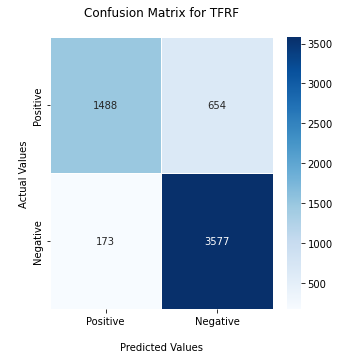

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
ax = sns.heatmap(conf_matrix, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['Positive', 'Negative'],
                    yticklabels = ['Positive', 'Negative'])
ax.set_title("Confusion Matrix for TFRF\n")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("\nActual Values")
plt.show()